In [3]:
import pandas as pd
k=pd.read_csv(r"dev_with_labels.tsv",delimiter='\t')


In [8]:
k.head()
k["Label"].unique()


array(['moderate', 'not depression', 'severe'], dtype=object)

In [9]:
l=k.loc[(k["Label"]=="severe")]
m=k.loc[(k["Label"]=="moderate")]
n=k.loc[(k["Label"]=="not depression")]
l.head()

,PID,Text data,Label
4136,dev_pid_4137,I Just Realized Why I do Poorly in School Mome...,severe
4137,dev_pid_4138,my libido is extremely low and id like to fix ...,severe
4138,dev_pid_4139,How can I [F30] stop taking paroxetine gradual...,severe
4139,dev_pid_4140,I just took 5 more prozac pills than i should’...,severe
4140,dev_pid_4141,Dreams/nightmares. : Hello I am taking propano...,severe


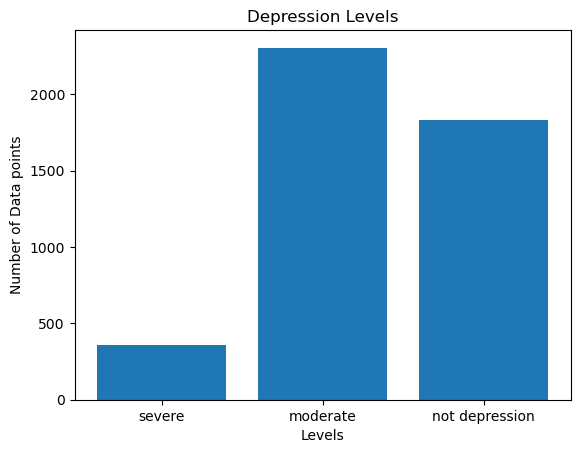

In [14]:
import matplotlib.pyplot as plt

l_count = len(l)
m_count = len(m)
n_count = len(n)

plt.bar(['severe', 'moderate', 'not depression'], [l_count, m_count, n_count])

plt.title('Depression Levels')
plt.xlabel('Levels')
plt.ylabel('Number of Data points')

plt.show()
